In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('/content/Delinquency_prediction_dataset.csv')

In [3]:
df.head()

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late


In [4]:
df.shape


(500, 19)

In [5]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   500 non-null    int64  
 2   Income                461 non-null    float64
 3   Credit_Score          498 non-null    float64
 4   Credit_Utilization    500 non-null    float64
 5   Missed_Payments       500 non-null    int64  
 6   Delinquent_Account    500 non-null    int64  
 7   Loan_Balance          471 non-null    float64
 8   Debt_to_Income_Ratio  500 non-null    float64
 9   Employment_Status     500 non-null    object 
 10  Account_Tenure        500 non-null    int64  
 11  Credit_Card_Type      500 non-null    object 
 12  Location              500 non-null    object 
 13  Month_1               500 non-null    object 
 14  Month_2               500 non-null    object 
 15  Month_3               5

In [6]:
df.describe()

,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Account_Tenure
count,500.000000,461.000000,498.000000,500.000000,500.000000,500.000000,471.000000,500.000000,500.000000
mean,46.266000,108379.893709,577.716867,0.491446,2.968000,0.160000,48654.428875,0.298862,9.740000
std,16.187629,53662.723741,168.881211,0.197103,1.946935,0.366973,29395.537273,0.094521,5.923054
min,18.000000,15404.000000,301.000000,0.050000,0.000000,0.000000,612.000000,0.100000,0.000000
25%,33.000000,62295.000000,418.250000,0.356486,1.000000,0.000000,23716.500000,0.233639,5.000000
50%,46.500000,107658.000000,586.000000,0.485636,3.000000,0.000000,45776.000000,0.301634,10.000000
75%,59.250000,155734.000000,727.250000,0.634440,5.000000,0.000000,75546.500000,0.362737,15.000000
max,74.000000,199943.000000,847.000000,1.025843,6.000000,1.000000,99620.000000,0.552956,19.000000


In [7]:
df.isnull().sum()

,0
Customer_ID,0
Age,0
Income,39
Credit_Score,2
Credit_Utilization,0
Missed_Payments,0
Delinquent_Account,0
Loan_Balance,29
Debt_to_Income_Ratio,0
Employment_Status,0


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
# Useful for columns like Employment_Status, Credit_Card_Type, etc.
df['Employment_Status'].value_counts()
df['Credit_Card_Type'].value_counts()
df['Delinquent_Account'].value_counts()


,count
Delinquent_Account,
0,420
1,80


In [10]:
# See what types of values exist in Month_1 to Month_6
for col in ['Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6']:
    print(f"{col}:", df[col].value_counts(), "\n")


Month_1: Month_1
On-time    177
Missed     164
Late       159
Name: count, dtype: int64 

Month_2: Month_2
Late       173
Missed     167
On-time    160
Name: count, dtype: int64 

Month_3: Month_3
Late       169
On-time    169
Missed     162
Name: count, dtype: int64 

Month_4: Month_4
Late       181
Missed     160
On-time    159
Name: count, dtype: int64 

Month_5: Month_5
Missed     187
On-time    162
Late       151
Name: count, dtype: int64 

Month_6: Month_6
Late       172
Missed     168
On-time    160
Name: count, dtype: int64 



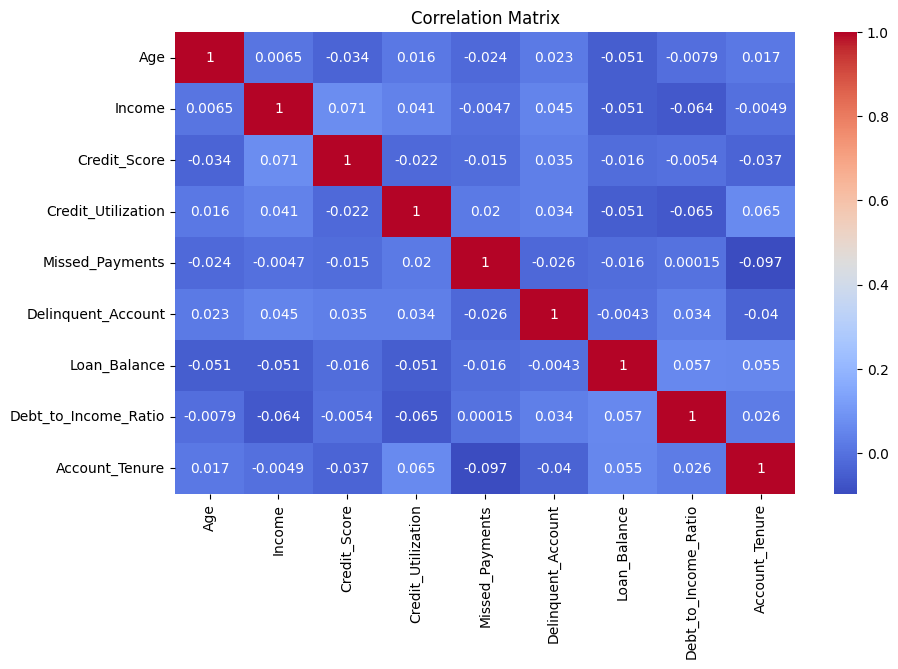

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [12]:
#count missing values in each column
missing_data = df.isnull().sum()
missing_data[missing_data>0] #show only columns wiht missing values

,0
Income,39
Credit_Score,2
Loan_Balance,29


In [13]:
# Calculate the percentage of missing values
missing_percent = (df.isnull().sum()) / (len(df)) *100
missing_percent[missing_percent>0].sort_values(ascending=False)

,0
Income,7.8
Loan_Balance,5.8
Credit_Score,0.4


In [14]:
# prompt: # Drop a column if more than 50% of values are missing
# df = df.drop(columns=['Column_Name'])  # Replace with actual column name

# Get columns with more than 50% missing values
cols_to_drop = missing_percent[missing_percent > 50].index

# Drop these columns from the DataFrame
df = df.drop(columns=cols_to_drop)

# Verify the changes
print(df.isnull().sum())

Customer_ID              0
Age                      0
Income                  39
Credit_Score             2
Credit_Utilization       0
Missed_Payments          0
Delinquent_Account       0
Loan_Balance            29
Debt_to_Income_Ratio     0
Employment_Status        0
Account_Tenure           0
Credit_Card_Type         0
Location                 0
Month_1                  0
Month_2                  0
Month_3                  0
Month_4                  0
Month_5                  0
Month_6                  0
dtype: int64


In [15]:
# impute missing income with median
df['Income'] = df['Income'].fillna(df['Income'].median())
#Impute missing credit score with mean
df['Credit_Score'] = df['Credit_Score'].fillna(df['Credit_Score'].mean())

In [16]:
# prompt: # Impute missing employment status with mode (most frequent)
# df['Employment_Status'].fillna(df['Employment_Status'].mode()[0], inplace=True)

# Impute missing Employment_Status with mode (most frequent)
df['Employment_Status'].fillna(df['Employment_Status'].mode()[0], inplace=True)

/tmp/ipython-input-16-688495747.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Employment_Status'].fillna(df['Employment_Status'].mode()[0], inplace=True)


In [17]:
import numpy as np

# Generate synthetic income values from a normal distribution
income_mean = df['Income'].mean()
income_std = df['Income'].std()

missing_income_count = df['Income'].isnull().sum()

# Replace missing values with synthetic values
synthetic_income = np.random.normal(income_mean, income_std, missing_income_count)
df.loc[df['Income'].isnull(), 'Income'] = synthetic_income



In [18]:
df.isnull().sum()

,0
Customer_ID,0
Age,0
Income,0
Credit_Score,0
Credit_Utilization,0
Missed_Payments,0
Delinquent_Account,0
Loan_Balance,29
Debt_to_Income_Ratio,0
Employment_Status,0


In [19]:
# prompt: # check for credit utilization > (i.e, 100%)-  invalid
# df[df['Credit_Utilization']>1]
#  # optionally clip values at 1
#  df['Credit_Utilizaiton'] = df['Credit_Utilizaiton'].clip(upper=1)

df['Credit_Utilization'] = df['Credit_Utilization'].clip(upper=1)


In [20]:
df.to_csv("cleaned_delinquency_data.csv", index=False)


In [21]:
# Table showing count and % of missing values before cleaning
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100
missing_summary = pd.DataFrame({'Missing Count': missing_count, 'Missing %': missing_percent})
missing_summary[missing_summary['Missing Count'] > 0].sort_values(by='Missing %', ascending=False)



,Missing Count,Missing %
Loan_Balance,29,5.8


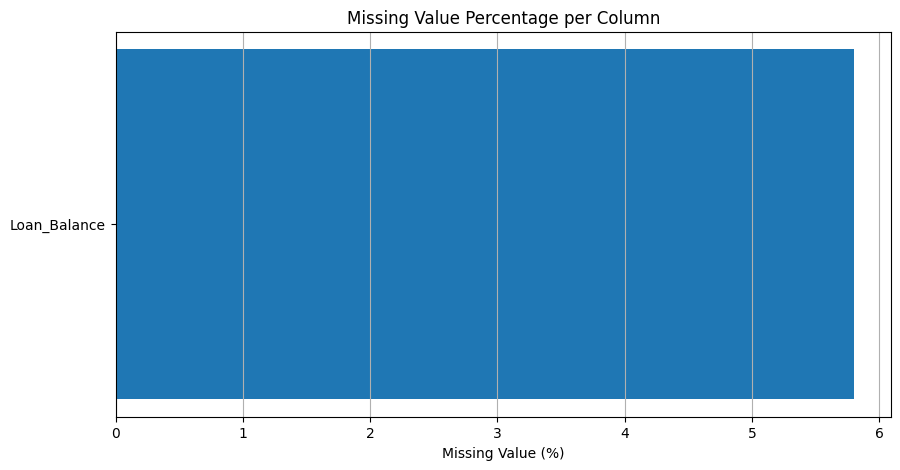

In [22]:
import matplotlib.pyplot as plt

# Filter only missing columns
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]

# Plot missing % as bar chart
plt.figure(figsize=(10, 5))
plt.barh(missing_summary.index, missing_summary['Missing %'])
plt.xlabel("Missing Value (%)")
plt.title("Missing Value Percentage per Column")
plt.grid(axis='x')
plt.show()


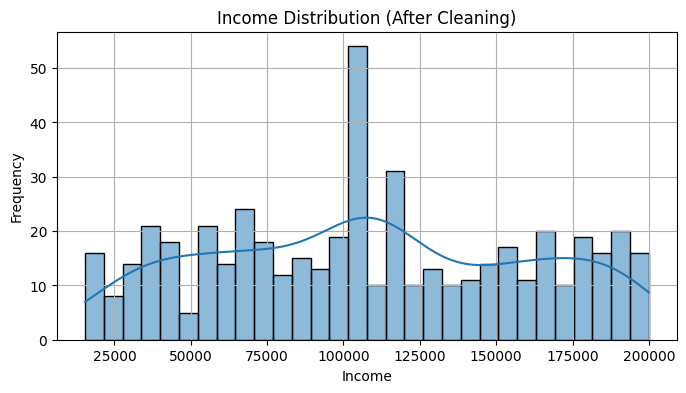

In [23]:
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(df['Income'], bins=30, kde=True)
plt.title("Income Distribution (After Cleaning)")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [24]:
# Ensure all missing values have been handled
df.isnull().sum()


,0
Customer_ID,0
Age,0
Income,0
Credit_Score,0
Credit_Utilization,0
Missed_Payments,0
Delinquent_Account,0
Loan_Balance,29
Debt_to_Income_Ratio,0
Employment_Status,0


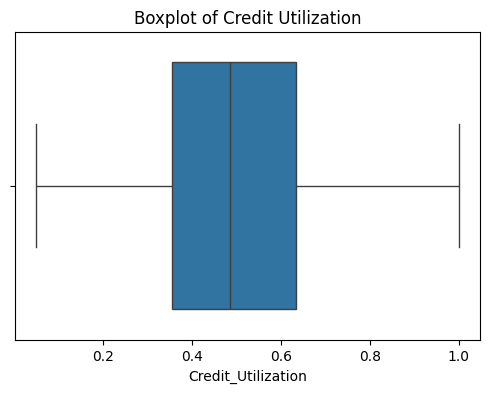

In [25]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Credit_Utilization'])
plt.title("Boxplot of Credit Utilization")
plt.show()



**Step 3** of the project Start here.

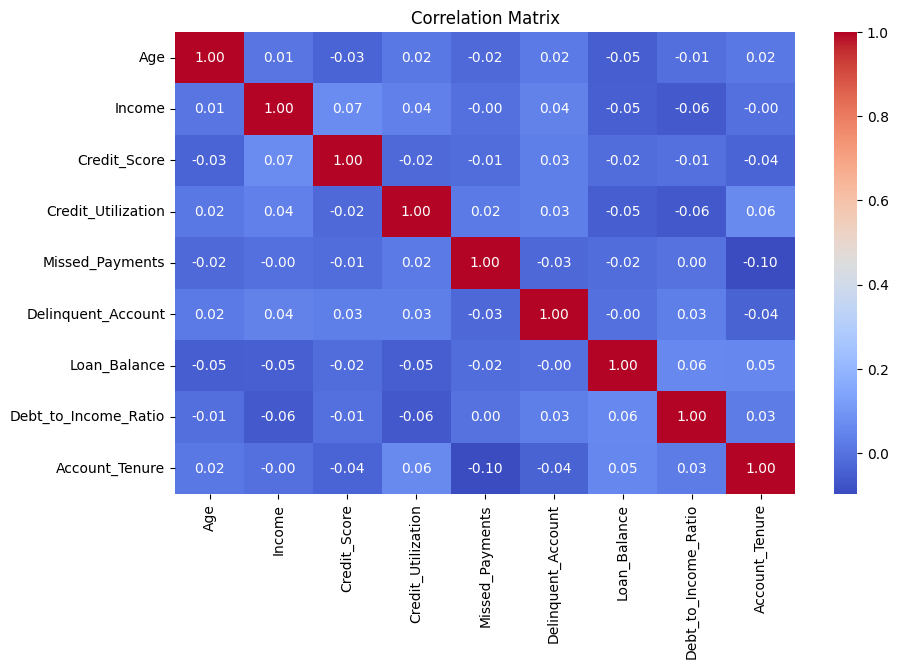

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


**2. Visualizing High-Risk Features**

A. Missed Payments vs Delinquency

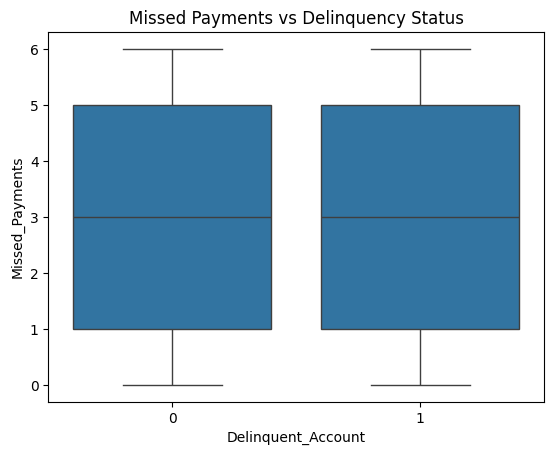

In [27]:
sns.boxplot(x='Delinquent_Account',y='Missed_Payments',data=df)
plt.title("Missed Payments vs Delinquency Status")
plt.show()

B. Credit Utilization vs Delinquency

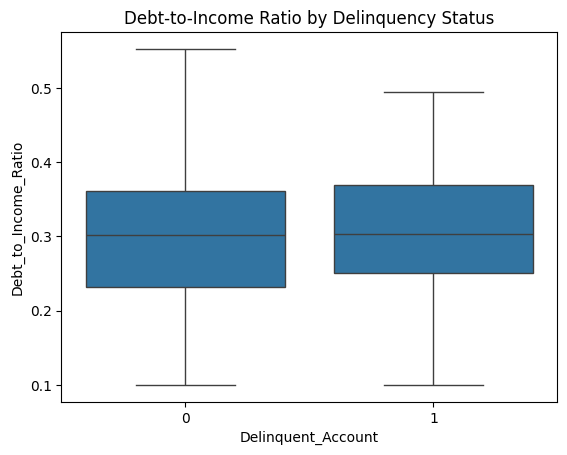

In [28]:
sns.boxplot(x='Delinquent_Account', y='Debt_to_Income_Ratio', data=df)
plt.title("Debt-to-Income Ratio by Delinquency Status")
plt.show()


 C. Debt-to-Income Ratio vs Delinquency

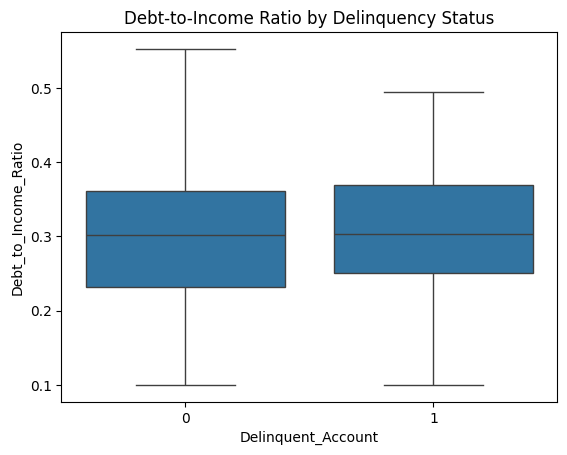

In [29]:
sns.boxplot(x='Delinquent_Account', y='Debt_to_Income_Ratio', data=df)
plt.title("Debt-to-Income Ratio by Delinquency Status")
plt.show()



 3. Check Categorical Risk Factors


📌 Employment Status and Delinquency

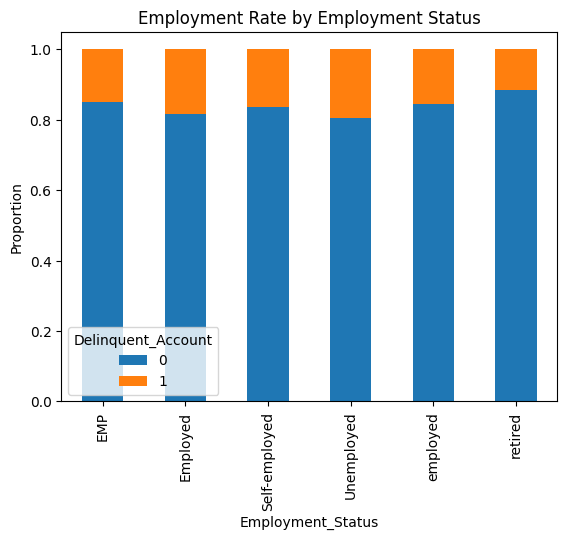

In [33]:
pd.crosstab(df['Employment_Status'],df['Delinquent_Account'],normalize='index').plot(kind='bar',stacked=True)
plt.title('Employment Rate by Employment Status')
plt.ylabel("Proportion")
plt.show()

In [35]:
df.groupby('Delinquent_Account')[['Credit_Utilization','Missed_Payments','Debt_to_Income_Ratio']].mean()

,Credit_Utilization,Missed_Payments,Debt_to_Income_Ratio
Delinquent_Account,,,
0,0.488357,2.990476,0.297445
1,0.506887,2.850000,0.306301


from matplotlib import pyplot as plt
_df_0['Delinquent_Account'].plot(kind='hist', bins=20, title='Delinquent_Account')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Credit_Utilization'].plot(kind='hist', bins=20, title='Credit_Utilization')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Missed_Payments'].plot(kind='hist', bins=20, title='Missed_Payments')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Debt_to_Income_Ratio'].plot(kind='hist', bins=20, title='Debt_to_Income_Ratio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Delinquent_Account', y='Credit_Utilization', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Credit_Utilization', y='Missed_Payments', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Missed_Payments', y='Debt_to_Income_Ratio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Delinquent_Account']
  ys = series['Missed_Payments']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Delinquent_Account', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Delinquent_Account')
_ = plt.ylabel('Missed_Payments')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Delinquent_Account']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Delinquent_Account'}, axis=1)
              .sort_values('Delinquent_Account', ascending=True))
  xs = counted['Delinquent_Account']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Delinquent_Account', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Delinquent_Account')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Credit_Utilization']
  ys = series['Missed_Payments']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Credit_Utilization', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Credit_Utilization')
_ = plt.ylabel('Missed_Payments')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Credit_Utilization']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Credit_Utilization'}, axis=1)
              .sort_values('Credit_Utilization', ascending=True))
  xs = counted['Credit_Utilization']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Credit_Utilization', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Credit_Utilization')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['Delinquent_Account'].plot(kind='line', figsize=(8, 4), title='Delinquent_Account')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Credit_Utilization'].plot(kind='line', figsize=(8, 4), title='Credit_Utilization')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Missed_Payments'].plot(kind='line', figsize=(8, 4), title='Missed_Payments')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Debt_to_Income_Ratio'].plot(kind='line', figsize=(8, 4), title='Debt_to_Income_Ratio')
plt.gca().spines[['top', 'right']].set_visible(False)